In [1]:
import numpy as np
import rk_4_imp as rk4imp

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['mathtext.rm'] = 'dejavuserif'
plt.rcParams['mathtext.it'] = 'dejavuserif'
plt.rcParams['mathtext.bf'] = 'dejavuserif'

In [108]:
def od_syst(y,t,*args):
    x,v = y
    
    km = args[0]
    
    x_dot = v
    v_dot = -km*np.sin(x)
    
    return np.array([x_dot,v_dot])

In [234]:
ci = np.array([1,0,0])
km = 1

solution = rk4imp.solve_rk4(od_syst,20,0.1,ci,km)

In [235]:
x = [sol[0] for sol in solution]
v = [sol[1] for sol in solution]
t = [sol[2] for sol in solution]

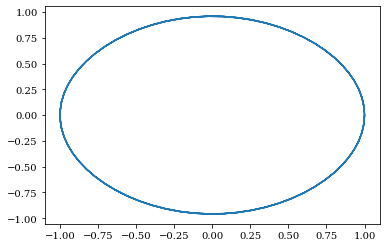

In [236]:
plt.plot(x,v)

In [29]:
def c_deq(C,t,*params):
    
    c1,c2 = C
    
    omega_0,omega_E,alpha = params
    
    c1_dot = c2 * np.exp(-1j * omega_0 * t) * np.cos(omega_E * t) * alpha / 1j
    c2_dot =  c1 * np.exp(1j * omega_0 * t) * np.cos(omega_E * t) * alpha / 1j
    
    return np.array([c1_dot,c2_dot])

In [317]:
ci_C = np.array([1+0j,0+0j,0])
omega_0,alpha = 0.14804406601634035, -0.1801265486974894
omega_E = omega_0

In [322]:
solve_C = rk4imp.solve_rk4(c_deq,100,0.01,ci_C,omega_0,omega_E,alpha)

In [323]:
c1 = np.array([(solvC[0][0].real**2 + solvC[0][0].imag**2).real for solvC in solve_C])
c2 = np.array([(solvC[1][0].real**2 + solvC[1][0].imag**2).real for solvC in solve_C])
t = np.array([solvC[2][0].real for solvC in solve_C])

In [324]:
c21 = c1+c2

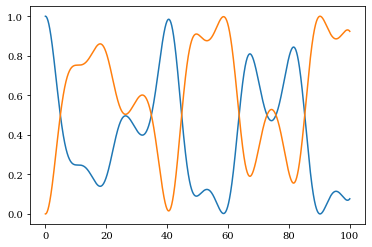

In [326]:
plt.plot(t,c1)
plt.plot(t,c2)

In [327]:
def ab_deq(AB,t,*params):

    a1,b1,a2,b2 = AB
    
    omega_0,omega_E,alpha = params
    
    a1_dot = (np.cos(omega_0*t)*b2 - np.sin(omega_0*t)*a2)*np.cos(omega_E*t)*alpha
    b1_dot = (-np.cos(omega_0*t)*a2 - np.sin(omega_0*t)*b2)*np.cos(omega_E*t)*alpha

    a2_dot = (np.cos(omega_0*t)*b1 + np.sin(omega_0*t)*a1)*np.cos(omega_E*t)*alpha
    b2_dot = (-np.cos(omega_0*t)*a1 + np.sin(omega_0*t)*b1)*np.cos(omega_E*t)*alpha

    return np.array([a1,b1,a2,b2])

In [247]:
ci_AB = np.array([1,0,0,0,0])
omega_0,alpha = 0.14804406601634035, -0.1801265486974894
omega_E = omega_0+0.1

In [331]:
solve_AB = rk4imp.solve_rk4(ab_deq,10,0.1,ci_AB,omega_0,omega_E,alpha)

In [332]:
a1 = np.array([sol[0] for sol in solve_AB])
b1 = np.array([sol[1] for sol in solve_AB])
a2 = np.array([sol[2] for sol in solve_AB])
b2 = np.array([sol[3] for sol in solve_AB])

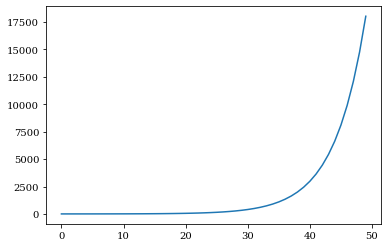

In [335]:
plt.plot((a1**2+b1**2)[:50])

In [338]:
from scipy.integrate import odeint

In [343]:
def ab_deq_odi(AB,t,omega_0,omega_E,alpha):

    a1,b1,a2,b2 = AB
    
    a1_dot = (np.cos(omega_0*t)*b2 - np.sin(omega_0*t)*a2)*np.cos(omega_E*t)*alpha
    b1_dot = (-np.cos(omega_0*t)*a2 - np.sin(omega_0*t)*b2)*np.cos(omega_E*t)*alpha

    a2_dot = (np.cos(omega_0*t)*b1 + np.sin(omega_0*t)*a1)*np.cos(omega_E*t)*alpha
    b2_dot = (-np.cos(omega_0*t)*a1 + np.sin(omega_0*t)*b1)*np.cos(omega_E*t)*alpha

    return np.array([a1,b1,a2,b2])

In [352]:
ci_AB_odi = np.array([1,0,0,0])
t_odi = np.arange(0,10,0.1)
omega_0,alpha = 0.14804406601634035, -0.1801265486974894
omega_E = omega_0+0.1

In [353]:
sol_odi = odeint(ab_deq_odi,ci_AB_odi,t_odi,(omega_0,omega_E,alpha))

In [354]:
sol_odi.shape

c1_odi = sol_odi[:,0]**2 + sol_odi[:,1]**2
c2_odi = sol_odi[:,2]**2 + sol_odi[:,3]**2

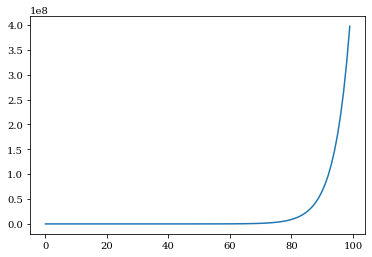

In [355]:
plt.plot(c1_odi)